In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla
from scipy.stats import bernoulli

# P5

## (a)

In [79]:

p = 0.75
N_val = np.array([10, 100, 1000, 10000])
shareEmployed = []
for N in N_val:
    vals = bernoulli.rvs(p, size=N)
    shareEmployed.append(sum(vals)/N)

print(shareEmployed)

[0.9, 0.75, 0.785, 0.7472]


## (b)

In [80]:
w = 900
c = 300
totalProfit = []
perCapitaProfit = []
for N in N_val:
    vals = bernoulli.rvs(p, size=N)
    numEmployed = sum(vals)
    # numUnemployed = sum(1-vals)
    numUnemployed = N - numEmployed
    totalProfit.append(c*numEmployed - w*numUnemployed)
    perCapitaProfit.append((c*numEmployed - w*numUnemployed)/N)

print(totalProfit)
print(perCapitaProfit)

[1800, 0, -3600, 10800]
[180.0, 0.0, -3.6, 1.08]


## (c)

In [81]:
theta_A = 0.6
pi = [0.75, 0.25]

# negative of profit
def profit(x):
    return -(x[0]*pi[0] - x[1]*pi[1])

# constraints
def u(x):
    return pi[0]*((1200-x[0])**(1-theta_A))/(1-theta_A) + pi[1]*(x[1]**(1-theta_A))/(1-theta_A)
def U(x):
    return u(x) - u([0,0])

def c_positive(x):
    return x[0]

def w_positive(x):
    return x[1]

solution = fmin_cobyla(profit, [200, 800], [U, c_positive, w_positive], rhoend=1e-7)

In [82]:
c = solution[0]
w = solution[1]
totalProfit = []
perCapitaProfit = []
for N in N_val:
    vals = bernoulli.rvs(p, size=N)
    numEmployed = sum(vals)
    numUnemployed = N - numEmployed
    totalProfit.append(c*numEmployed - w*numUnemployed)
    perCapitaProfit.append((c*numEmployed - w*numUnemployed)/N)

print(solution)
print(totalProfit)
print(perCapitaProfit)

[615.43285302 584.56714927]
[3754.3285255970804, 31543.285244550458, 310632.85243636835, 3162728.524471035]
[375.43285255970807, 315.4328524455046, 310.63285243636835, 316.2728524471035]


## (d)

In [83]:
theta_A = 0.6
theta_B = 0.85
pi = [0.75, 0.25]
sa = 0.5
sb = 1-sa

# negative of profit
def profit(x):
    return -(x[0]*pi[0] - x[1]*pi[1])

# constraints
def u_a(x):
    return pi[0]*((1200-x[0])**(1-theta_A))/(1-theta_A) + pi[1]*(x[1]**(1-theta_A))/(1-theta_A) 
def U_A(x):
    return u_a(x) - u_a([0,0])

def u_b(x):
    return pi[0]*((1200-x[0])**(1-theta_B))/(1-theta_B) + pi[1]*(x[1]**(1- theta_B))/(1-theta_B) 
def U_B(x):
    return u_b(x) - u_b([0,0])

def c_positive(x):
    return x[0]

def w_positive(x):
    return x[1]

solution1 = fmin_cobyla(profit, [300, 900], [U_A, c_positive, w_positive], rhoend=1e-7)
profit1 = -1*profit(solution1)*sa
print("Plicy from satisfying just A is:", solution1 )
print("Profit from satisfying just A is:", profit1 )

Plicy from satisfying just A is: [615.43286276 584.5671785 ]
Profit from satisfying just A is: 157.71642622275215


In [84]:
solution2 = fmin_cobyla(profit, [300, 900], [U_B, c_positive, w_positive], rhoend=1e-7)
profit2 = -1*profit(solution2)*sb

print("Plicy from satisfying just B is:", solution2 )
print("Profit from satisfying just B is:", profit2)

Plicy from satisfying just B is: [1078.50982146  482.31736075]
Profit from satisfying just B is: 344.1515129541243


In [85]:
solution3 = fmin_cobyla(profit, [300, 900], [U_A, U_B, c_positive, w_positive], rhoend=1e-7)
profit3 = -1*profit(solution3)
print("Plicy from satisfying bith is:", solution3 )
print("Profit from satisfying both A and B is:", profit3)

Plicy from satisfying bith is: [615.43286276 584.5671785 ]
Profit from satisfying both A and B is: 315.4328524455043


## (e)

In [86]:
sbArray = [0, .25, .5, .75, 1]
priceArray = np.zeros([5,2])
totalProfit = np.zeros(5)

for i in range(len(sbArray)):
    sb = sbArray[i]
    sa = 1-sb
    # print(sa, sb)

    solution_A = fmin_cobyla(profit, [300, 900], [U_A, c_positive, w_positive], rhoend=1e-7)
    profit_A = -1*profit(solution1)*sa

    solution_B = fmin_cobyla(profit, [300, 900], [U_B, c_positive, w_positive], rhoend=1e-7)
    profit_B = -1*profit(solution2)*sb

    solution_Both = fmin_cobyla(profit, [300, 900], [U_A, U_B, c_positive, w_positive], rhoend=1e-7)
    profit_Both = -1*profit(solution3)


    profits = [profit_A, profit_B, profit_Both]
    if np.max(profits) == profit_A:
        priceArray[i] = solution_A
        totalProfit[i] = profit_A
    elif np.max(profits) == profit_B:
        priceArray[i] = solution_B
        totalProfit[i] = profit_B
    else:
        priceArray[i] = solution_Both
        totalProfit[i] = profit_Both

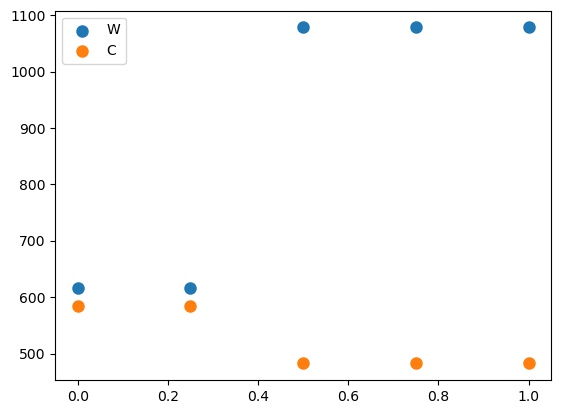

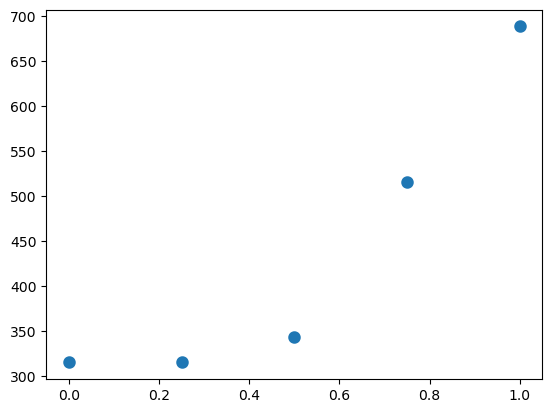

In [87]:
plt.scatter(sbArray,[priceArray[0][0], priceArray[1][0], priceArray[2][0],
priceArray[3][0],priceArray[4][0]], label= "W", lw = 3.0)
plt.scatter(sbArray,[priceArray[0][1], priceArray[1][1], priceArray[2][1],
priceArray[3][1],priceArray[4][1]], label= "C", lw = 3.0)
plt.legend(loc=0)
plt.show()
# when sb is small, service both types so choose low W, high C.
# When sb is big, service both types, so choose high W, low C.
plt.scatter(sbArray,[totalProfit[0], totalProfit[1], totalProfit[2],
totalProfit[3],totalProfit[4]], label= "Total Profit", lw = 3.0)
plt.show()

## (f)

In [88]:
w = 950
c = 250
totalProfit = []
perCapitaProfit = []
N_val = np.array([1000000])
for N in N_val:
    vals = bernoulli.rvs(p, size=N)
    numEmployed = sum(vals)
    # numUnemployed = sum(1-vals)
    numUnemployed = N - numEmployed
    totalProfit.append(c*numEmployed - w*numUnemployed)
    perCapitaProfit.append((c*numEmployed - w*numUnemployed)/N)

print(totalProfit)
print(perCapitaProfit)

[-49716800]
[-49.7168]
